# StockX Sneaker Data Contest
source: https://www.kaggle.com/datasets/hudsonstuck/stockx-data-contest

The data consists of a random sample of all Off-White x Nike and Yeezy 350 sales from between 9/1/2017 (the month that Off-White first debuted “The Ten” collection) and the present. There are 99,956 total sales in the data set; 27,794 Off-White sales, and 72,162 Yeezy sales. The sample consists of U.S. sales only.

- Order Date: Time shoe was purchases by a customer on StockX
- Brand: Yeezy or Off-White only
- Sneaker Name: Name of shoe being released
- Sale Price: Price of shoe when it was resold
- Retail Price: Price person pays at a non-resell store like Nike, Footlocker, Champs, Footaction and so on.
- Release Date: Date shoe is set to be released to the public
- Shoe Size: Size of shoe
- Buyer Region: Region of customer paying resell prices on StockX (An aftermarket for desirable shoes)


Overall Goal: Predict the price of Yeezy or Off-White shoes (the only brands in this dataset)

**Import some of the libraries well be using**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Read the file**

In [2]:
df = pd.read_csv("StockX-Data-Contest-2019-3.csv")

**Check the head of the dataframe**

In [3]:
df.head(3)

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
0,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,"$1,097",$220,9/24/16,11.0,California
1,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,$685,$220,11/23/16,11.0,California
2,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,$690,$220,11/23/16,11.0,California


**Check the datatypes of the data**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99956 entries, 0 to 99955
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order Date    99956 non-null  object 
 1   Brand         99956 non-null  object 
 2   Sneaker Name  99956 non-null  object 
 3   Sale Price    99956 non-null  object 
 4   Retail Price  99956 non-null  object 
 5   Release Date  99956 non-null  object 
 6   Shoe Size     99956 non-null  float64
 7   Buyer Region  99956 non-null  object 
dtypes: float64(1), object(7)
memory usage: 6.1+ MB


**Before going further, check if there are null values in the dataset**

<AxesSubplot:>

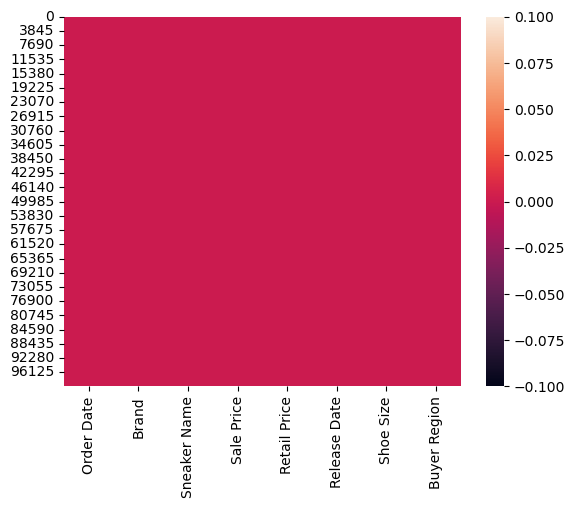

In [5]:
sns.heatmap(df.isnull())

**No null values, so no modifying of dataset needed**

**Convert sale price, retail price to integers**

In [6]:
def dollar_string_to_int(dollar_string):
    amount = dollar_string.split("$")[-1]

    try:
        amount_int = int(amount)
    except ValueError:
        amount_int = int(amount.replace(",", ""))
    
    return amount_int

df["Sale Price"] = df["Sale Price"].apply(dollar_string_to_int)
df["Retail Price"] = df["Retail Price"].apply(dollar_string_to_int)

**Convert dates to datetime objects to get month, day, year as numerical values**

In [7]:
df["Release Date"] = pd.to_datetime(df["Release Date"])
df["Order Date"] = pd.to_datetime(df["Order Date"])

**Pull year, month, day from the 2 dates columns, and append to dataframe**

In [8]:
df["R_Year"] = df["Release Date"].apply(lambda x: x.year)
df["R_Month"] = df["Release Date"].apply(lambda x: x.month)
df["R_Day"] = df["Release Date"].apply(lambda x: x.day)
df["O_Year"] = df["Order Date"].apply(lambda x: x.year)
df["O_Month"] = df["Order Date"].apply(lambda x: x.month)
df["O_Day"] = df["Order Date"].apply(lambda x: x.day)

In [9]:
df.head(1)

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region,R_Year,R_Month,R_Day,O_Year,O_Month,O_Day
0,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,1097,220,2016-09-24,11.0,California,2016,9,24,2017,9,1


**Removing dates columns as we converted to numerical columns**

In [10]:
df.drop(["Order Date", "Release Date"], axis=1, inplace=True)
df.head(1)

,Brand,Sneaker Name,Sale Price,Retail Price,Shoe Size,Buyer Region,R_Year,R_Month,R_Day,O_Year,O_Month,O_Day
0,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,1097,220,11.0,California,2016,9,24,2017,9,1


**Can I consider Buyer Region as a categorical variable? We have 51 states as 100,000 entries**

In [11]:
len(df["Buyer Region"].value_counts())
# On average there would be 2000 per state, pretty sure its heavily skewed to east and west coast states

51

In [12]:
# https://sparkbyexamples.com/pandas/pandas-find-unique-values-from-columns/#:~:text=You%20can%20get%20unique%20values,to%20get%20from%20multiple%20columns.
regions = list(df["Buyer Region"].unique())
data = []

for x in regions:
#     print(f"{x}: {len(df[df['Buyer Region'] == x])}")
    count = len(df[df["Buyer Region"] == x])
    data.append([x, count])
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html
df_regions = pd.DataFrame(data, range(0,51), columns=["state","amount"])

# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html
df_regions.sort_values("amount", ascending=False, kind="quicksort").head(10)

,state,amount
0,California,19349
4,New York,16525
10,Oregon,7681
6,Florida,6376
8,Texas,5876
7,New Jersey,4720
28,Illinois,3782
17,Pennsylvania,3109
16,Massachusetts,2903
3,Michigan,2762


**Too many states for labels, but above for reference**

<AxesSubplot:>

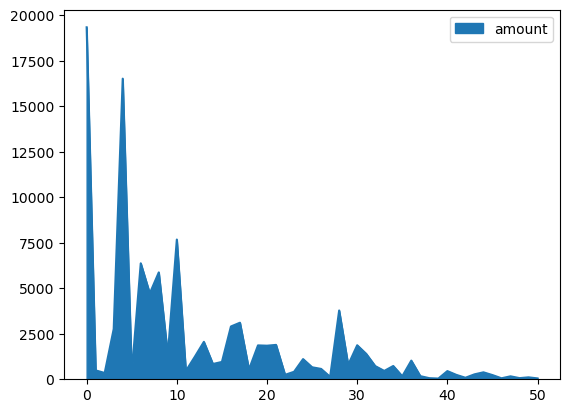

In [13]:
df_regions.plot.area()

**Before adding all the states as numerical values add if shoe is the off-white brand (aesthetics for df only)**

In [14]:
#https://www.geeksforgeeks.org/how-to-convert-categorical-variable-to-numeric-in-pandas/
# df["Brand"].replace(["Yeezy", "Off-White"], [0,1], inplace=True)

is_yeezy_df = pd.get_dummies(df["Brand"], drop_first=True)
is_yeezy_df.head(1)

,Off-White
0,0


In [15]:
df.drop("Brand", axis=1, inplace=True)
df.head(1)

,Sneaker Name,Sale Price,Retail Price,Shoe Size,Buyer Region,R_Year,R_Month,R_Day,O_Year,O_Month,O_Day
0,Adidas-Yeezy-Boost-350-Low-V2-Beluga,1097,220,11.0,California,2016,9,24,2017,9,1


In [16]:
df = pd.concat([df, is_yeezy_df], axis=1)
df.head(1)

,Sneaker Name,Sale Price,Retail Price,Shoe Size,Buyer Region,R_Year,R_Month,R_Day,O_Year,O_Month,O_Day,Off-White
0,Adidas-Yeezy-Boost-350-Low-V2-Beluga,1097,220,11.0,California,2016,9,24,2017,9,1,0


**Start adding the states as numerical values**

In [17]:
state_num = pd.get_dummies(df["Buyer Region"], drop_first=True)
state_num.head(1)

,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,Georgia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
df = pd.concat([df, state_num], axis=1)
df.head(1)

,Sneaker Name,Sale Price,Retail Price,Shoe Size,Buyer Region,R_Year,R_Month,R_Day,O_Year,O_Month,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,Adidas-Yeezy-Boost-350-Low-V2-Beluga,1097,220,11.0,California,2016,9,24,2017,9,...,0,0,0,0,0,0,0,0,0,0


**Drop buyer region, and ~Sneaker Name~ columns.
Could probably use the features in it, but that would take additional analysis**

In [19]:
df.drop(["Buyer Region"], axis=1, inplace=True)

In [20]:
df.head(1)

,Sneaker Name,Sale Price,Retail Price,Shoe Size,R_Year,R_Month,R_Day,O_Year,O_Month,O_Day,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,Adidas-Yeezy-Boost-350-Low-V2-Beluga,1097,220,11.0,2016,9,24,2017,9,1,...,0,0,0,0,0,0,0,0,0,0


**Describe the data**

In [21]:
df.describe()

,Sale Price,Retail Price,Shoe Size,R_Year,R_Month,R_Day,O_Year,O_Month,O_Day,Off-White,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
count,99956.000000,99956.00000,99956.000000,99956.000000,99956.000000,99956.000000,99956.000000,99956.000000,99956.000000,99956.000000,...,99956.000000,99956.000000,99956.000000,99956.000000,99956.000000,99956.000000,99956.000000,99956.000000,99956.000000,99956.0000
mean,446.634719,208.61359,9.344181,2017.467246,8.052243,21.673696,2018.029013,7.532654,16.150686,0.278062,...,0.000550,0.007313,0.058786,0.004502,0.000840,0.020589,0.018638,0.001661,0.008404,0.0004
std,255.982969,25.20001,2.329588,0.579352,3.612667,7.805765,0.542357,4.089962,9.085088,0.448047,...,0.023451,0.085205,0.235225,0.066946,0.028977,0.142005,0.135244,0.040718,0.091286,0.0200
min,186.000000,130.00000,3.500000,2015.000000,2.000000,1.000000,2017.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000
25%,275.000000,220.00000,8.000000,2017.000000,6.000000,16.000000,2018.000000,3.000000,8.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000
50%,370.000000,220.00000,9.500000,2017.000000,9.000000,25.000000,2018.000000,8.000000,16.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000
75%,540.000000,220.00000,11.000000,2018.000000,11.000000,27.000000,2018.000000,11.000000,24.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000
max,4050.000000,250.00000,17.000000,2019.000000,12.000000,30.000000,2019.000000,12.000000,31.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000


- 75% of sale prices are under $540
- 75% of shoe sizes are under 11
- The mean for Order day is the 22nd day of the month. People get checks bi-weekly. Usually every other Friday.
- The mean for Order month is the 8th month, (back to school sales?)
- The mean for Release day also the 22nd dat of the month, coincidence(no)
- The mean for Release month is the 8th month, no coincidence here
- Cant really look at years, or retail price since this data pertains to off-whites and yeezy's only
- Off white sales accounted for about 28% of total sales for this dataset

**Visualize some of the described data**

Text(0, 0.5, 'Count')

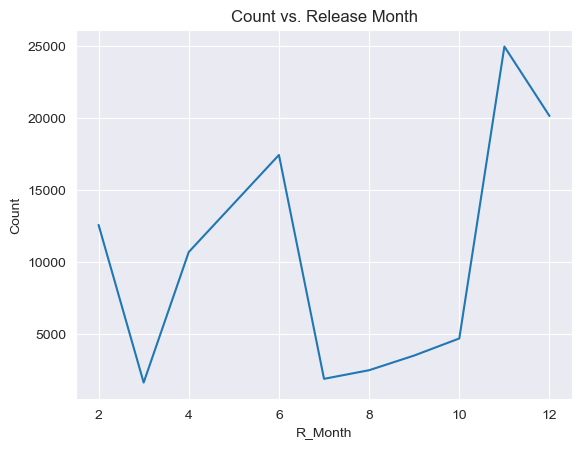

In [22]:
groupby_months = df.groupby("R_Month")
aggr_count = groupby_months.count()
sns.set_style("darkgrid")
# https://stackoverflow.com/questions/31632637/label-axes-on-seaborn-barplot
fig = sns.lineplot(x="R_Month",y="Off-White", data=aggr_count)
plt.title("Count vs. Release Month")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

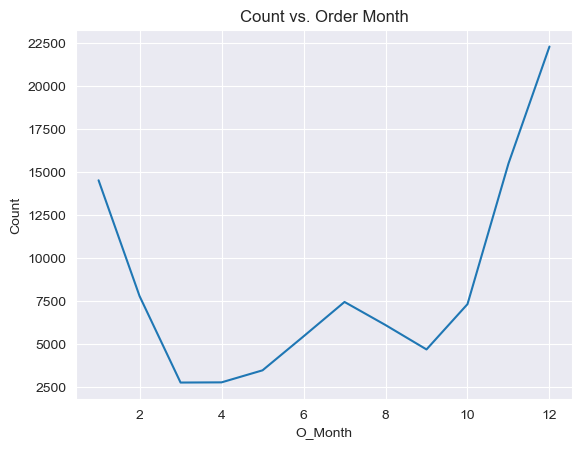

In [23]:
groupby_order_m = df.groupby("O_Month")
aggr_2 = groupby_order_m.count()
fig = sns.lineplot(x="O_Month", y="Off-White", data=aggr_2)
plt.title("Count vs. Order Month")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

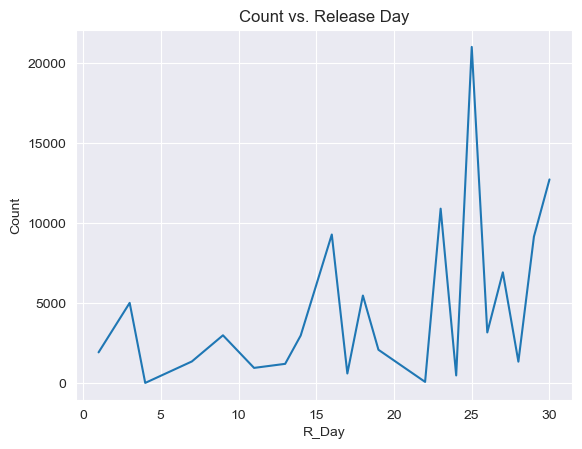

In [24]:
groupby_days = df.groupby("R_Day")
aggr_3 = groupby_days.count()
fig = sns.lineplot(x="R_Day", y="Off-White", data=aggr_3)
plt.title("Count vs. Release Day")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

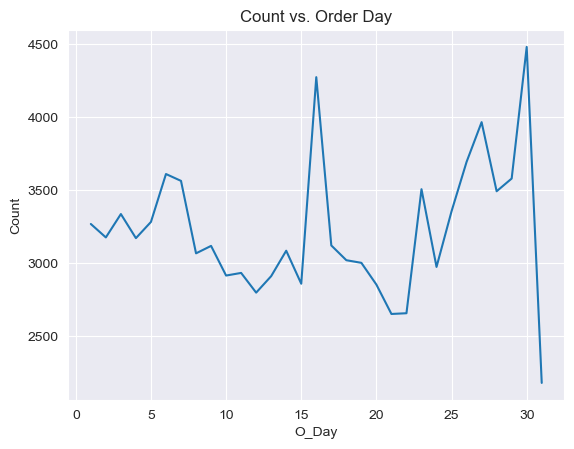

In [25]:
groupby_o_day = df.groupby("O_Day")
aggr_4 = groupby_o_day.count()
fig = sns.lineplot(x="O_Day", y="Off-White", data=aggr_4)
plt.title("Count vs. Order Day")
plt.ylabel("Count")
# Here you can see that the sharp spike is prolonged, as not everyone has the same payday

<AxesSubplot:xlabel='O_Month', ylabel='Sale Price'>

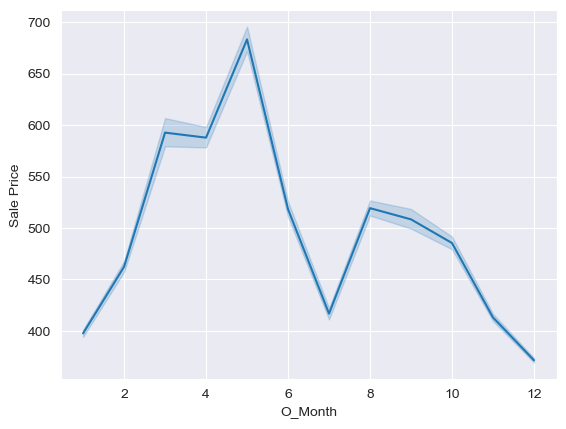

In [26]:
# People saving money for holiday gifts, can't spend a lot on everyone
sns.lineplot(x="O_Month", y="Sale Price", data=df)

<AxesSubplot:xlabel='R_Month', ylabel='Retail Price'>

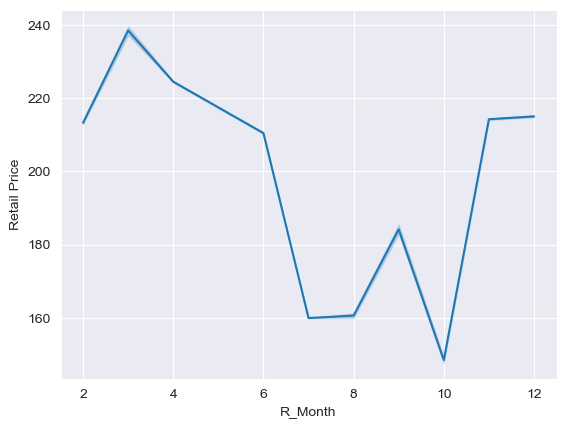

In [27]:
# Is this Adidas and Nike trying to avoid releasing shoes at the same time?
# Jordans are 160 at most, Yeezys sit at 220, some models more expensive
sns.lineplot(x="R_Month", y="Retail Price", data=df)

### Afterthoughts (after training model)
**After training the linear model, results from metrics were bad. Yes some values are 
predicted really closely. But if I wanted to resell shoes based on my current model, I would go broke**

In [28]:
# Lets try using the name of the shoe now, that we added back the column by running the cells again
df["is_V2"] = df["Sneaker Name"].apply(lambda x: int(x.__contains__("V2")))

In [29]:
df.head(1)

,Sneaker Name,Sale Price,Retail Price,Shoe Size,R_Year,R_Month,R_Day,O_Year,O_Month,O_Day,...,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,is_V2
0,Adidas-Yeezy-Boost-350-Low-V2-Beluga,1097,220,11.0,2016,9,24,2017,9,1,...,0,0,0,0,0,0,0,0,0,1


In [30]:
# factor out some features that might help (only common names) (mostly nike stuff)
df["is_nike"] = df["Sneaker Name"].apply(lambda x: int(x.__contains__("Nike")))
df["is_adidas"] = df["Sneaker Name"].apply(lambda x: int(x.__contains__("Adidas")))
df["is_airmax"] = df["Sneaker Name"].apply(lambda x: int(x.__contains__("Max")))
df["is_jordan"] = df["Sneaker Name"].apply(lambda x: int(x.__contains__("Jordan-1")))
df["is_vapormax"] = df["Sneaker Name"].apply(lambda x: int(x.__contains__("VaporMax")))
df["is_blazer"] = df["Sneaker Name"].apply(lambda x: int(x.__contains__("Blazer")))
df["is_presto"] = df["Sneaker Name"].apply(lambda x: int(x.__contains__("Presto")))

In [31]:
df.head(1)

,Sneaker Name,Sale Price,Retail Price,Shoe Size,R_Year,R_Month,R_Day,O_Year,O_Month,O_Day,...,Wisconsin,Wyoming,is_V2,is_nike,is_adidas,is_airmax,is_jordan,is_vapormax,is_blazer,is_presto
0,Adidas-Yeezy-Boost-350-Low-V2-Beluga,1097,220,11.0,2016,9,24,2017,9,1,...,0,0,1,0,1,0,0,0,0,0


**Seems to be working, don't use states columns as they don't seem to affect results anyway**

In [32]:
# get all the unique names of shoes, I used to sell shoes, but I can't remember all the names
# I also never referred to the full name like this
sneaker_names = list(df["Sneaker Name"].unique())
sneaker_names

['Adidas-Yeezy-Boost-350-Low-V2-Beluga',
 'Adidas-Yeezy-Boost-350-V2-Core-Black-Copper',
 'Adidas-Yeezy-Boost-350-V2-Core-Black-Green',
 'Adidas-Yeezy-Boost-350-V2-Core-Black-Red',
 'Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017',
 'Adidas-Yeezy-Boost-350-V2-Core-Black-White',
 'Adidas-Yeezy-Boost-350-V2-Cream-White',
 'Adidas-Yeezy-Boost-350-V2-Zebra',
 'Adidas-Yeezy-Boost-350-Low-Moonrock',
 'Nike-Air-Max-90-Off-White',
 'Nike-Air-Presto-Off-White',
 'Nike-Air-VaporMax-Off-White',
 'Air-Jordan-1-Retro-High-Off-White-Chicago',
 'Nike-Blazer-Mid-Off-White',
 'Adidas-Yeezy-Boost-350-Low-Pirate-Black-2016',
 'Adidas-Yeezy-Boost-350-Low-Oxford-Tan',
 'Adidas-Yeezy-Boost-350-Low-Turtledove',
 'Adidas-Yeezy-Boost-350-Low-Pirate-Black-2015',
 'Adidas-Yeezy-Boost-350-V2-Semi-Frozen-Yellow',
 'Nike-Air-Force-1-Low-Off-White',
 'Nike-Air-Max-97-Off-White',
 'Nike-Air-Force-1-Low-Virgil-Abloh-Off-White-AF100',
 'Nike-React-Hyperdunk-2017-Flyknit-Off-White',
 'Nike-Zoom-Fly-Off-White',
 'Adidas-Y

In [33]:
# checking that contains works as I expect it, should have done this before...
print("Air-Max-97".__contains__("Air-Max-90"))

False


In [34]:
# factor out some more features from nike shoes, barely any for yeezys
df["is_airmax90"] = df["Sneaker Name"].apply(lambda x: int(x.__contains__("Air-Max-90")))
df["is_airmax97"] = df["Sneaker Name"].apply(lambda x: int(x.__contains__("Air-Max-97")))
df["is_zoomfly"] = df["Sneaker Name"].apply(lambda x: int(x.__contains__("Zoom-Fly")))
df["is_airforce"] = df["Sneaker Name"].apply(lambda x: int(x.__contains__("Air-Force-1")))
# Yeezy shoes containing low seem to be the original releases of the Yeezy
df["is_yeezy_original"] = df["Sneaker Name"].apply(lambda x: int(x.__contains__("Low") and x.__contains__("Yeezy")))
# Yeezy shoes containing core seem to be the rereleases
df["is_yeezy_core"] = df["Sneaker Name"].apply(lambda x: int(x.__contains__("Core")))

In [35]:
df.head()

,Sneaker Name,Sale Price,Retail Price,Shoe Size,R_Year,R_Month,R_Day,O_Year,O_Month,O_Day,...,is_jordan,is_vapormax,is_blazer,is_presto,is_airmax90,is_airmax97,is_zoomfly,is_airforce,is_yeezy_original,is_yeezy_core
0,Adidas-Yeezy-Boost-350-Low-V2-Beluga,1097,220,11.0,2016,9,24,2017,9,1,...,0,0,0,0,0,0,0,0,1,0
1,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,685,220,11.0,2016,11,23,2017,9,1,...,0,0,0,0,0,0,0,0,0,1
2,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,690,220,11.0,2016,11,23,2017,9,1,...,0,0,0,0,0,0,0,0,0,1
3,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,1075,220,11.5,2016,11,23,2017,9,1,...,0,0,0,0,0,0,0,0,0,1
4,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,828,220,11.0,2017,2,11,2017,9,1,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
df[df["Sneaker Name"].__contains__("Air-Max")].head(10)

# Linear Regression

## Training and Testing Data

Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets.
**Set a variable X equal to the numerical features of the customers and a variable y equal to the "Yearly Amount Spent" column.**

In [51]:
df.columns

Index(['Sneaker Name', 'Sale Price', 'Retail Price', 'Shoe Size', 'R_Year',
       'R_Month', 'R_Day', 'O_Year', 'O_Month', 'O_Day', 'Off-White', 'Alaska',
       'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut',
       'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Hawaii',
       'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky',
       'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan',
       'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming', 'is_V2', 'is_nike',
       'is_adidas', 'is_airmax', 'is_jordan', 'is_vapormax', 'is_blazer',
       'is_presto', 'is_airmax90', 'is_airmax97', 'is_z

In [52]:
# I dropped Alabama by accident, only a count of 457. Fix later
# Completely forgot about the get_dummies(drop_first=True)
X = df[['Retail Price', 'Shoe Size', 'R_Year',
       'R_Month', 'R_Day', 'O_Year', 'O_Month', 'O_Day', 'Off-White','is_V2', 'is_nike',
       'is_adidas', 'is_airmax', 'is_jordan', 'is_vapormax', 'is_blazer',
       'is_presto', 'is_airmax90', 'is_airmax97', 'is_zoomfly', 'is_airforce',
       'is_yeezy_original', 'is_yeezy_core']]

y = df["Sale Price"]

**Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.3 and random_state=101**

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Training the Model

Now its time to train our model on our training data!

**Import LinearRegression from sklearn.linear_model**

In [55]:
from sklearn.linear_model import LinearRegression

In [56]:
linear_regression_object = LinearRegression()
linear_regression_object

LinearRegression()

**Train/fit lm on the training data.**

In [57]:
# train the model by passing in x,y training sets
linear_regression_object.fit(X_train, y_train)
#print(linear_regression_object.score(X_train,y_train))

LinearRegression()

**Print out the coefficients of the model**

In [58]:
print(linear_regression_object.coef_)

[-1.23428661e+00  2.25188421e+00 -1.21043817e+02  9.21552869e-01
 -5.05680190e+00 -6.79088490e+01 -9.56868556e+00 -1.88777359e-01
  6.38466727e+01 -1.40594594e+02 -3.39006821e+02 -9.95098490e+01
  2.70340598e+02  4.02853494e+02  1.52955765e+02  1.92849668e+02
  4.18560838e+02  1.23877852e+01  1.04997048e+02  3.67629211e+01
  1.84852209e+02  2.92946950e+02  2.82975332e+02]


In [59]:
print(linear_regression_object.intercept_)

382225.62413731485


In [61]:
# creating a Dataframe with our coefficient data, passing in our x columns in for the rows
# then passing in the columns we want to see
coeff_df = pd.DataFrame(linear_regression_object.coef_, X.columns, columns=["Coefficients"])
coeff_df

,Coefficients
Retail Price,-1.234287
Shoe Size,2.251884
R_Year,-121.043817
R_Month,0.921553
R_Day,-5.056802
O_Year,-67.908849
O_Month,-9.568686
O_Day,-0.188777
Off-White,63.846673
is_V2,-140.594594


## Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values!

**Use lm.predict() to predict off the X_test set of the data.**

In [62]:
# pass in x test dataset, and predict a value
predictions = linear_regression_object.predict(X_test)
predictions

array([449.85993024, 596.49816475, 425.66590272, ..., 284.12886545,
       317.25553638, 376.22374645])

**Create a scatterplot of the real test values versus the predicted values.**

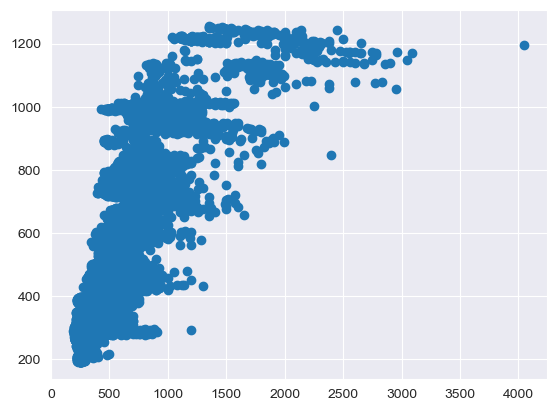

In [63]:
# So were testing our values against y_test
# We make predictions off X_test values and then check those corresponsing y_predictions
# with y_test. (Look at documentation, I could see myself getting confused if I ever look back at this again)
plt.scatter(y_test, predictions)

In [64]:
from sklearn import metrics

In [66]:
print("MAE", metrics.mean_absolute_error(y_test, predictions))
print("MSE", metrics.mean_squared_error(y_test, predictions))
print("RMSE", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE 83.4504621158842
MSE 19659.267786085198
RMSE 140.21151089010203


In [67]:
check = pd.DataFrame({"Real":y_test, "Prediction": predictions})
check.head(1000)

,Real,Prediction
20585,370,449.859930
52343,645,596.498165
25183,427,425.665903
72040,275,210.700490
18761,370,459.044339
...,...,...
84263,506,478.650393
41388,320,309.900257
61503,296,306.946724
75839,286,356.644040


**Conclusions**
Based on the metric values above, we cannot accurately predict the price of shoes being sold on
StockX without more relevant data. Yes, dates affect the prices of shoes, and we can use that to predict
shoe value because a trend occurs from 2016 to 2019. Buyer region is also essential, as the east and west coasts are fashion and cultural relevance drivers. It looks like the model
is severely overfitted. Even by removing the columns of the state from our training, we still get similar results, e.g., going from 60 columns for X to only using eight columns. Meaning it did not matter if I removed the states or not. The one column I did not use but was critical
was the sneaker name. (A significant factor in reselling desired shoes like these is the shoe's colorway, do
people like it? Is it a desirable color that hasn't been released before? Is the shoe a 2nd iteration
of a previous model? For example, there is Adidas-Yeezy-Boost-350-V2-Core-Black-Green, and there is Adidas-Yeezy-Boost-350-Low-Pirate-Black-2016. The latter is one of the most desired models, as stock was limited when the shoe came out and was never re-released to the public, even up to now. The V2 models have been re-released countless times and buyers are tired of them. An enormous appeal of yeezys between 2018 and 2020 was that you were guaranteed to make money on your investment if you could get your hands on them, that is slowly becoming not the case. This is the opposite case with the "Off-White" shoes, Virgil Abloh wanted these to be limited, and thus didn't release much stock. Some models were more desirable than others, for example only runners liked the vaporfly but the air jordans had the most appeal to everyone, and thus were the most desired because supply would run out instantaneously and people would essentially have no chance to get them.

**NOTE**
After class presentation I went ahead, and stopped using the states columns for my model as suggested. I pulled out as many model types from the shoes, leaving out colors because there was overlap between "Off-White" and "Yeezys". With 
these new columns I was able to get a better model than what I originally had, it's still bad, but an improvement of what there was previously.

# Below is the model with minimum features e.g. no state columns

**Results ended up being the same regardless**

- Posted this here because I am trying to improve above model

MAE 116.14219615046225
MSE 37008.36948332585
RMSE 192.3755948225394


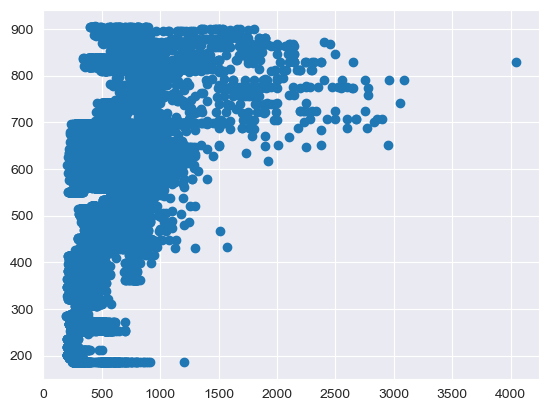

In [549]:
features = df[["Retail Price", "R_Year", "R_Month", "R_Day", "O_Year", "O_Month", "O_Day", "Off-White"]]
response = df["Sale Price"]
# train based off x(features), and y(response variable)
X_train, X_test, y_train, y_test = train_test_split(features, response, test_size=0.3, random_state=101)
# create our linear model
linear_model = LinearRegression()
# fit our data
linear_regression_object.fit(X_train, y_train)
# get our predictions based off model
predictions = linear_regression_object.predict(X_test)
# plot data, should be linear
plt.scatter(y_test, predictions)
print("MAE", metrics.mean_absolute_error(y_test, predictions))
print("MSE", metrics.mean_squared_error(y_test, predictions))
print("RMSE", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

In [550]:
check = pd.DataFrame({"Real":y_test, "Prediction": predictions})
check.head(1000)

,Real,Prediction
20585,370,478.490065
52343,645,623.134205
25183,427,443.716189
72040,275,195.173897
18761,370,495.810819
...,...,...
84263,506,644.791778
41388,320,661.200570
61503,296,359.169925
75839,286,321.578182


# Below is Model with state columns and no new columns based off features off the "Sneaker Name" column

- Notice how model without states is the same (maybe for finished model, leave out states since it doesnt affect it?

MAE 116.055817361318
MSE 36706.58723065848
RMSE 191.58963236735562


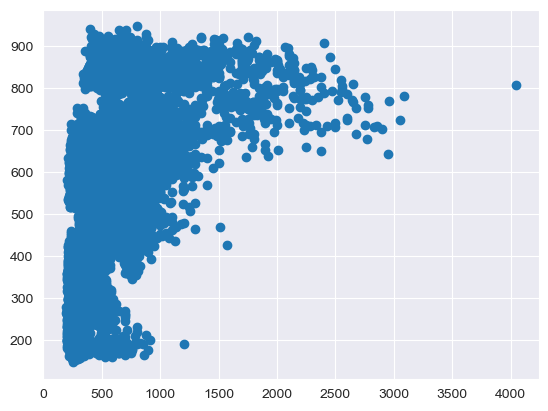

In [552]:
features_with_states = df[['Retail Price', 'Shoe Size', 'R_Year',
       'R_Month', 'R_Day', 'O_Year', 'O_Month', 'O_Day', 'Off-White', 'Alaska',
       'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut',
       'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Hawaii',
       'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky',
       'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan',
       'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming']]
response_with_states = df["Sale Price"]
# train based off x(features), and y(response variable)
X_train, X_test, y_train, y_test = train_test_split(features_with_states, response_with_states, test_size=0.3, random_state=101)
# create our linear model
linear_model = LinearRegression()
# fit our data
linear_regression_object.fit(X_train, y_train)
# get our predictions based off model
predictions = linear_regression_object.predict(X_test)
# plot data, should be linear
plt.scatter(y_test, predictions)
print("MAE", metrics.mean_absolute_error(y_test, predictions))
print("MSE", metrics.mean_squared_error(y_test, predictions))
print("RMSE", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

In [553]:
check = pd.DataFrame({"Real":y_test, "Prediction": predictions})
check.head(1000)

,Real,Prediction
20585,370,461.675970
52343,645,621.884747
25183,427,450.172542
72040,275,216.375637
18761,370,482.652028
...,...,...
84263,506,629.483798
41388,320,669.091015
61503,296,347.313388
75839,286,317.584704
